In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

Instructions for updating:
Use the retry module or similar alternatives.


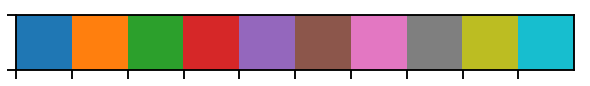

<IPython.core.display.Javascript object>

In [2]:
import edward as ed
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')
sns.set_context('talk', font_scale=1.4)
sess = ed.get_session()
sns.palplot(sns.color_palette())

In [3]:
df_fifa = pd.read_csv('data/fifa19/data.csv')
df_fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


<IPython.core.display.Javascript object>

In [4]:
df_fifa.columns

Index([u'Unnamed: 0', u'ID', u'Name', u'Age', u'Photo', u'Nationality',
       u'Flag', u'Overall', u'Potential', u'Club', u'Club Logo', u'Value',
       u'Wage', u'Special', u'Preferred Foot', u'International Reputation',
       u'Weak Foot', u'Skill Moves', u'Work Rate', u'Body Type', u'Real Face',
       u'Position', u'Jersey Number', u'Joined', u'Loaned From',
       u'Contract Valid Until', u'Height', u'Weight', u'LS', u'ST', u'RS',
       u'LW', u'LF', u'CF', u'RF', u'RW', u'LAM', u'CAM', u'RAM', u'LM',
       u'LCM', u'CM', u'RCM', u'RM', u'LWB', u'LDM', u'CDM', u'RDM', u'RWB',
       u'LB', u'LCB', u'CB', u'RCB', u'RB', u'Crossing', u'Finishing',
       u'HeadingAccuracy', u'ShortPassing', u'Volleys', u'Dribbling', u'Curve',
       u'FKAccuracy', u'LongPassing', u'BallControl', u'Acceleration',
       u'SprintSpeed', u'Agility', u'Reactions', u'Balance', u'ShotPower',
       u'Jumping', u'Stamina', u'Strength', u'LongShots', u'Aggression',
       u'Interceptions', u'Positioning

<IPython.core.display.Javascript object>

In [5]:
df_fifa = df_fifa[[
    'ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
    'Wage', 'Special', 'Preferred Foot', 'International Reputation',
    'Weak Foot', 'Skill Moves', 'Position', 'Crossing', 'Finishing',
    'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
    'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
    'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina',
    'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning',
    'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle',
    'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning',
    'GKReflexes'
]]

<IPython.core.display.Javascript object>

In [6]:
df_fifa.Position.value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64

<IPython.core.display.Javascript object>

In [55]:
df_sel = df_fifa[df_fifa != 'GK']


def recategorize(x):
    if x in [
        'LF', 'RF', 'CF', 'ST', 'RS', 'LS', 'LW', 'RW', 'CAM', 'LAM', 'RAM',
        'LM', 'RM'
    ]:
        return 'fw'
    elif x in ['LDM', 'RDM', 'LCM', 'RCM', 'CDM', 'CM']:
        return 'mf'
    else:
        return 'df'


df_sel['pos'] = df_sel['Position'].apply(recategorize)
df_sel.pos.value_counts()

df    7951
fw    6637
mf    3619
Name: pos, dtype: int64

<IPython.core.display.Javascript object>

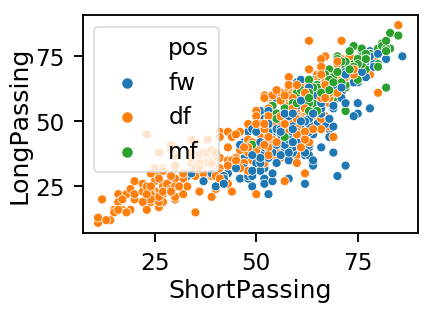

<IPython.core.display.Javascript object>

In [62]:
sns.scatterplot(
    x='ShortPassing', y='LongPassing', hue='pos', data=df_sel.sample(n=1000)
)

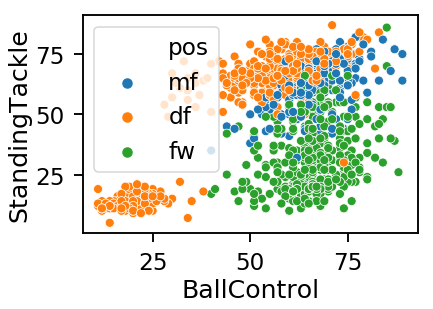

<IPython.core.display.Javascript object>

In [60]:
sns.scatterplot(
    x='BallControl', y='StandingTackle', hue='pos', data=df_sel.sample(n=1000)
)

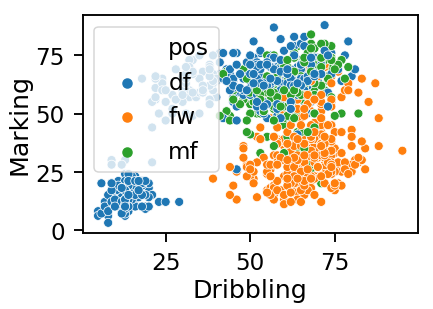

<IPython.core.display.Javascript object>

In [63]:
sns.scatterplot(
    x='Dribbling', y='Marking', hue='pos', data=df_sel.sample(n=1000)
)

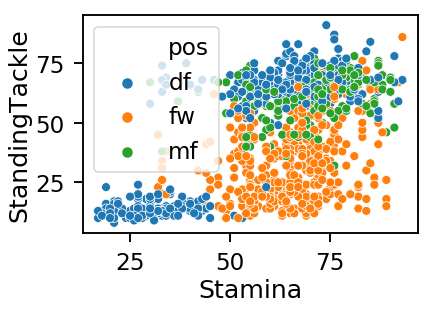

<IPython.core.display.Javascript object>

In [66]:
sns.scatterplot(
    x='Stamina', y='StandingTackle', hue='pos', data=df_sel.sample(n=1000)
)

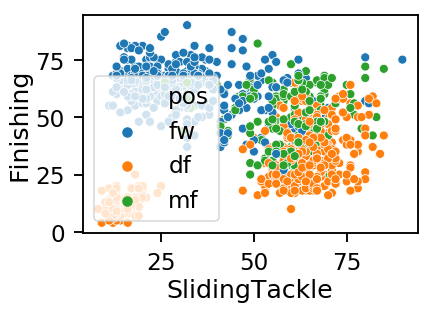

<IPython.core.display.Javascript object>

In [68]:
sns.scatterplot(
    x='SlidingTackle', y='Finishing', hue='pos', data=df_sel.sample(n=1000)
)